___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [68]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [69]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [70]:
df.info()
# Examining data, we can say that RowNumber columns is useless for us. There are 3 object type features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [72]:
df.shape

(10000, 11)

In [73]:
df.isnull().sum().any()

False

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [75]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

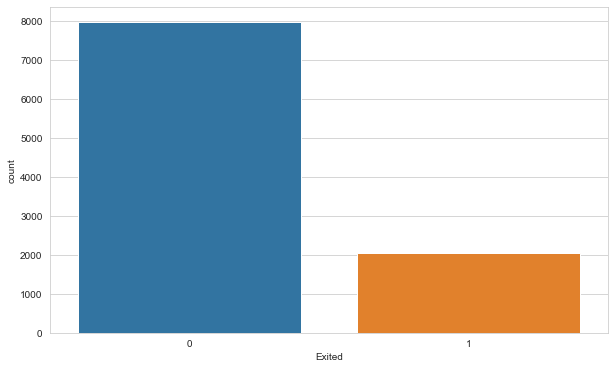

In [76]:
sns.countplot(df["Exited"]);

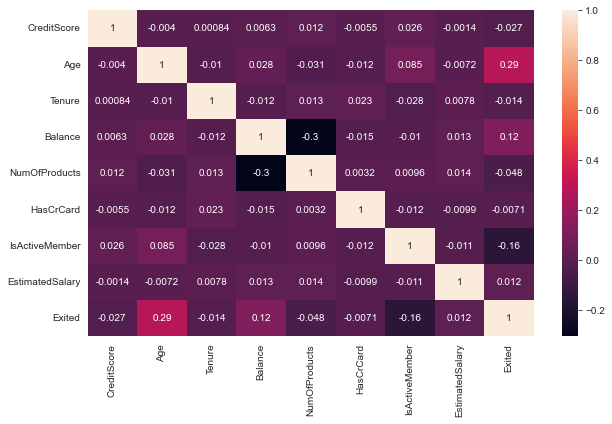

In [77]:
sns.heatmap(df.corr(), annot=True);
#Since there is no big correlation between features, it can be excluded that there is not multicolinearity problem.

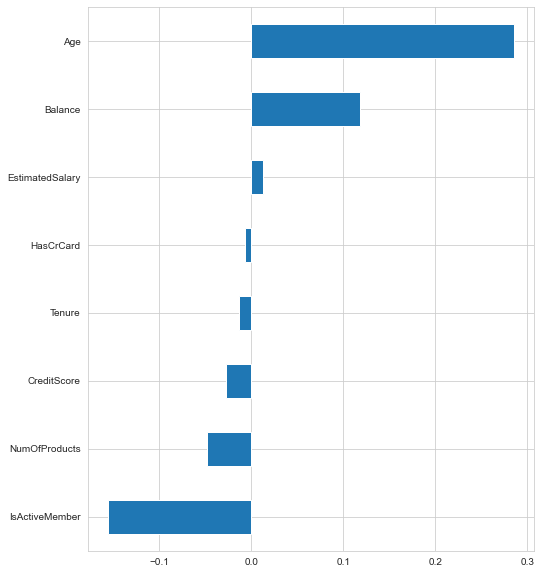

In [78]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [79]:
df_object = df.select_dtypes(include ="object").head()
df_object

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [80]:
df[['Geography','Gender']].nunique()

Geography    3
Gender       2
dtype: int64

In [81]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [82]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [83]:
df=pd.get_dummies(df, drop_first=True)

In [84]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [86]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [88]:
scaler = MinMaxScaler()

In [89]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
X.shape

(10000, 11)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [91]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [92]:
seed=101

tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [93]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose = 1)

Epoch 1/500
254/254 [==============================] - 2s 3ms/step - loss: 0.4977 - recall: 0.0133 - val_loss: 0.4500 - val_recall: 0.0000e+00
Epoch 2/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4561 - recall: 0.0738 - val_loss: 0.4170 - val_recall: 0.1713
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4272 - recall: 0.1792 - val_loss: 0.3848 - val_recall: 0.3260
Epoch 4/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4013 - recall: 0.2863 - val_loss: 0.3488 - val_recall: 0.3978
Epoch 5/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3815 - recall: 0.3553 - val_loss: 0.3300 - val_recall: 0.4420
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3679 - recall: 0.3838 - val_loss: 0.3381 - val_recall: 0.5635
Epoch 7/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3627 - recall: 0.4140 - val_loss: 0.3159 - val_recall: 0.5083
Epoch 8/500
254/254 [==

254/254 [==============================] - 0s 2ms/step - loss: 0.3144 - recall: 0.4939 - val_loss: 0.3009 - val_recall: 0.5580
Epoch 118/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3109 - recall: 0.5030 - val_loss: 0.3022 - val_recall: 0.4862
Epoch 119/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3146 - recall: 0.5030 - val_loss: 0.3011 - val_recall: 0.5691
Epoch 120/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3114 - recall: 0.5097 - val_loss: 0.3236 - val_recall: 0.6519
Epoch 121/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3144 - recall: 0.5200 - val_loss: 0.3082 - val_recall: 0.4972
Epoch 122/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3120 - recall: 0.5024 - val_loss: 0.3005 - val_recall: 0.5746
Epoch 123/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3113 - recall: 0.5061 - val_loss: 0.3062 - val_recall: 0.5912
Epoch 124/500
254/254 [====

254/254 [==============================] - 1s 2ms/step - loss: 0.2985 - recall: 0.5430 - val_loss: 0.3090 - val_recall: 0.5967
Epoch 234/500
254/254 [==============================] - 1s 2ms/step - loss: 0.2986 - recall: 0.5424 - val_loss: 0.3107 - val_recall: 0.5801
Epoch 235/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2987 - recall: 0.5339 - val_loss: 0.3046 - val_recall: 0.6188
Epoch 236/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2971 - recall: 0.5357 - val_loss: 0.3123 - val_recall: 0.5912
Epoch 237/500
254/254 [==============================] - 1s 2ms/step - loss: 0.2967 - recall: 0.5351 - val_loss: 0.3114 - val_recall: 0.5028
Epoch 238/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2970 - recall: 0.5333 - val_loss: 0.3201 - val_recall: 0.5138
Epoch 239/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2966 - recall: 0.5303 - val_loss: 0.3173 - val_recall: 0.4972
Epoch 240/500
254/254 [====

254/254 [==============================] - 0s 2ms/step - loss: 0.2846 - recall: 0.5630 - val_loss: 0.3327 - val_recall: 0.5083
Epoch 350/500
254/254 [==============================] - 1s 2ms/step - loss: 0.2810 - recall: 0.5587 - val_loss: 0.3379 - val_recall: 0.5028
Epoch 351/500
254/254 [==============================] - 1s 2ms/step - loss: 0.2828 - recall: 0.5605 - val_loss: 0.3257 - val_recall: 0.5635
Epoch 352/500
254/254 [==============================] - 1s 2ms/step - loss: 0.2815 - recall: 0.5557 - val_loss: 0.3288 - val_recall: 0.5193
Epoch 353/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2819 - recall: 0.5551 - val_loss: 0.3431 - val_recall: 0.5470
Epoch 354/500
254/254 [==============================] - 1s 2ms/step - loss: 0.2814 - recall: 0.5508 - val_loss: 0.3294 - val_recall: 0.6077
Epoch 355/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2853 - recall: 0.5672 - val_loss: 0.3321 - val_recall: 0.5580
Epoch 356/500
254/254 [====

254/254 [==============================] - 0s 2ms/step - loss: 0.2718 - recall: 0.5732 - val_loss: 0.3688 - val_recall: 0.5138
Epoch 466/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2688 - recall: 0.5811 - val_loss: 0.3663 - val_recall: 0.4807
Epoch 467/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2726 - recall: 0.5720 - val_loss: 0.3678 - val_recall: 0.4917
Epoch 468/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2708 - recall: 0.5769 - val_loss: 0.3729 - val_recall: 0.5691
Epoch 469/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2699 - recall: 0.5854 - val_loss: 0.3698 - val_recall: 0.5028
Epoch 470/500
254/254 [==============================] - 0s 2ms/step - loss: 0.2688 - recall: 0.5769 - val_loss: 0.3678 - val_recall: 0.4972
Epoch 471/500
254/254 [==============================] - 1s 2ms/step - loss: 0.2707 - recall: 0.5860 - val_loss: 0.3628 - val_recall: 0.5028
Epoch 472/500
254/254 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [94]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 36)                432       
                                                                 
 dense_25 (Dense)            (None, 18)                666       
                                                                 
 dense_26 (Dense)            (None, 9)                 171       
                                                                 
 dense_27 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.498,0.013,0.450,0.000
1,0.456,0.074,0.417,0.171
2,0.427,0.179,0.385,0.326
3,0.401,0.286,0.349,0.398
4,0.382,0.355,0.330,0.442


In [96]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[760  36]
 [127  77]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.68      0.38      0.49       204

    accuracy                           0.84      1000
   macro avg       0.77      0.67      0.69      1000
weighted avg       0.82      0.84      0.82      1000



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

32/32 [==============================] - 0s 1ms/step


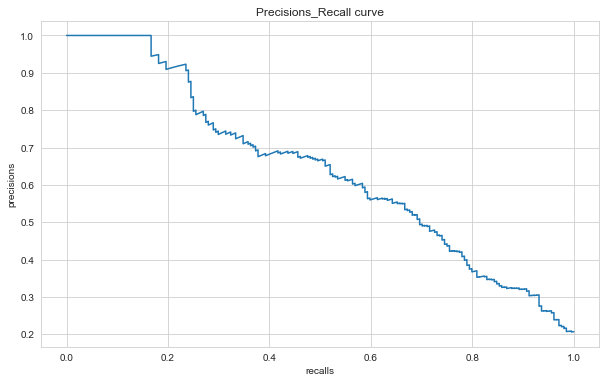

In [97]:
from sklearn.metrics import precision_recall_curve, average_precision_score
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precisions_Recall curve')
plt.show()

In [98]:
average_precision_score(y_test, y_pred_proba)

0.6422480824744734

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [99]:
seed=101

tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [100]:
from sklearn.utils import class_weight

class_weights=class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

class_weights={0:class_weights[0], 1:class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [101]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose = 1, class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 2s 3ms/step - loss: 0.6451 - recall: 0.6241 - val_loss: 0.6146 - val_recall: 0.7790
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5970 - recall: 0.6985 - val_loss: 0.5211 - val_recall: 0.7017
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5677 - recall: 0.6992 - val_loss: 0.5693 - val_recall: 0.8177
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5430 - recall: 0.7264 - val_loss: 0.5245 - val_recall: 0.8177
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5239 - recall: 0.7312 - val_loss: 0.4552 - val_recall: 0.7956
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5054 - recall: 0.7379 - val_loss: 0.5590 - val_recall: 0.8619
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4976 - recall: 0.7524 - val_loss: 0.4706 - val_recall: 0.8398
Epoch 8/500
254/254 [======

254/254 [==============================] - 1s 2ms/step - loss: 0.4074 - recall: 0.8002 - val_loss: 0.4701 - val_recall: 0.8287
Epoch 118/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4049 - recall: 0.7984 - val_loss: 0.3597 - val_recall: 0.7403
Epoch 119/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4085 - recall: 0.7996 - val_loss: 0.4105 - val_recall: 0.7514
Epoch 120/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4026 - recall: 0.8045 - val_loss: 0.5839 - val_recall: 0.8895
Epoch 121/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4082 - recall: 0.8021 - val_loss: 0.4488 - val_recall: 0.7956
Epoch 122/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4056 - recall: 0.8021 - val_loss: 0.4128 - val_recall: 0.7901
Epoch 123/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4039 - recall: 0.8111 - val_loss: 0.4211 - val_recall: 0.7956
Epoch 124/500
254/254 [====

254/254 [==============================] - 1s 2ms/step - loss: 0.3743 - recall: 0.8275 - val_loss: 0.4806 - val_recall: 0.7845
Epoch 234/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3774 - recall: 0.8311 - val_loss: 0.4846 - val_recall: 0.8177
Epoch 235/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3759 - recall: 0.8220 - val_loss: 0.4344 - val_recall: 0.8122
Epoch 236/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3756 - recall: 0.8341 - val_loss: 0.4800 - val_recall: 0.7735
Epoch 237/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3714 - recall: 0.8263 - val_loss: 0.4197 - val_recall: 0.7238
Epoch 238/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3756 - recall: 0.8287 - val_loss: 0.4560 - val_recall: 0.7624
Epoch 239/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3736 - recall: 0.8323 - val_loss: 0.4643 - val_recall: 0.7569
Epoch 240/500
254/254 [====

254/254 [==============================] - 1s 2ms/step - loss: 0.3546 - recall: 0.8456 - val_loss: 0.4245 - val_recall: 0.7790
Epoch 350/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3523 - recall: 0.8469 - val_loss: 0.4259 - val_recall: 0.6851
Epoch 351/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3522 - recall: 0.8456 - val_loss: 0.4605 - val_recall: 0.7680
Epoch 352/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3530 - recall: 0.8450 - val_loss: 0.4584 - val_recall: 0.7790
Epoch 353/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3519 - recall: 0.8444 - val_loss: 0.4792 - val_recall: 0.7459
Epoch 354/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3532 - recall: 0.8384 - val_loss: 0.4842 - val_recall: 0.7956
Epoch 355/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3572 - recall: 0.8456 - val_loss: 0.4502 - val_recall: 0.7459
Epoch 356/500
254/254 [====

254/254 [==============================] - 1s 2ms/step - loss: 0.3357 - recall: 0.8626 - val_loss: 0.4827 - val_recall: 0.7514
Epoch 466/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3358 - recall: 0.8656 - val_loss: 0.4843 - val_recall: 0.7348
Epoch 467/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3390 - recall: 0.8608 - val_loss: 0.4798 - val_recall: 0.7514
Epoch 468/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3376 - recall: 0.8620 - val_loss: 0.4975 - val_recall: 0.7514
Epoch 469/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3323 - recall: 0.8553 - val_loss: 0.4571 - val_recall: 0.7072
Epoch 470/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3338 - recall: 0.8674 - val_loss: 0.4560 - val_recall: 0.7293
Epoch 471/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3350 - recall: 0.8553 - val_loss: 0.4457 - val_recall: 0.6961
Epoch 472/500
254/254 [====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [102]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.645,0.624,0.615,0.779
1,0.597,0.699,0.521,0.702
2,0.568,0.699,0.569,0.818
3,0.543,0.726,0.525,0.818
4,0.524,0.731,0.455,0.796


In [103]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[676 120]
 [ 81 123]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       796
           1       0.51      0.60      0.55       204

    accuracy                           0.80      1000
   macro avg       0.70      0.73      0.71      1000
weighted avg       0.81      0.80      0.81      1000



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

32/32 [==============================] - 0s 1ms/step


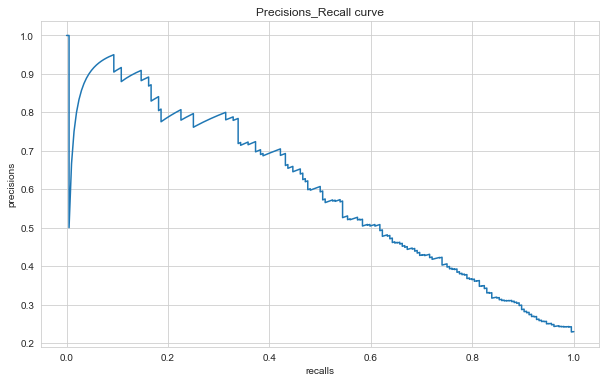

In [104]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precisions_Recall curve')
plt.show()

In [105]:
average_precision_score(y_test, y_pred_proba)

0.5931374980663807

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [106]:
seed=101

tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [107]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, 
          epochs = 500, verbose = 1, class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 2s 3ms/step - loss: 0.6451 - recall: 0.6241 - val_loss: 0.6146 - val_recall: 0.7790
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5970 - recall: 0.6985 - val_loss: 0.5211 - val_recall: 0.7017
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5677 - recall: 0.6992 - val_loss: 0.5693 - val_recall: 0.8177
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5430 - recall: 0.7264 - val_loss: 0.5245 - val_recall: 0.8177
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5239 - recall: 0.7312 - val_loss: 0.4552 - val_recall: 0.7956
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5054 - recall: 0.7379 - val_loss: 0.5590 - val_recall: 0.8619
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4976 - recall: 0.7524 - val_loss: 0.4706 - val_recall: 0.8398
Epoch 8/500
254/254 [======

254/254 [==============================] - 1s 2ms/step - loss: 0.4074 - recall: 0.8002 - val_loss: 0.4701 - val_recall: 0.8287
Epoch 118/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4049 - recall: 0.7984 - val_loss: 0.3597 - val_recall: 0.7403
Epoch 119/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4085 - recall: 0.7996 - val_loss: 0.4105 - val_recall: 0.7514
Epoch 120/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4026 - recall: 0.8045 - val_loss: 0.5839 - val_recall: 0.8895
Epoch 121/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4082 - recall: 0.8021 - val_loss: 0.4488 - val_recall: 0.7956
Epoch 122/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4056 - recall: 0.8021 - val_loss: 0.4128 - val_recall: 0.7901
Epoch 123/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4039 - recall: 0.8111 - val_loss: 0.4211 - val_recall: 0.7956
Epoch 124/500
254/254 [====

254/254 [==============================] - 1s 2ms/step - loss: 0.3743 - recall: 0.8275 - val_loss: 0.4806 - val_recall: 0.7845
Epoch 234/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3774 - recall: 0.8311 - val_loss: 0.4846 - val_recall: 0.8177
Epoch 235/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3759 - recall: 0.8220 - val_loss: 0.4344 - val_recall: 0.8122
Epoch 236/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3756 - recall: 0.8341 - val_loss: 0.4800 - val_recall: 0.7735
Epoch 237/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3714 - recall: 0.8263 - val_loss: 0.4197 - val_recall: 0.7238
Epoch 238/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3756 - recall: 0.8287 - val_loss: 0.4560 - val_recall: 0.7624
Epoch 239/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3736 - recall: 0.8323 - val_loss: 0.4643 - val_recall: 0.7569
Epoch 240/500
254/254 [====

254/254 [==============================] - 1s 2ms/step - loss: 0.3546 - recall: 0.8456 - val_loss: 0.4245 - val_recall: 0.7790
Epoch 350/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3523 - recall: 0.8469 - val_loss: 0.4259 - val_recall: 0.6851
Epoch 351/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3522 - recall: 0.8456 - val_loss: 0.4605 - val_recall: 0.7680
Epoch 352/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3530 - recall: 0.8450 - val_loss: 0.4584 - val_recall: 0.7790
Epoch 353/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3519 - recall: 0.8444 - val_loss: 0.4792 - val_recall: 0.7459
Epoch 354/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3532 - recall: 0.8384 - val_loss: 0.4842 - val_recall: 0.7956
Epoch 355/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3572 - recall: 0.8456 - val_loss: 0.4502 - val_recall: 0.7459
Epoch 356/500
254/254 [====

254/254 [==============================] - 1s 2ms/step - loss: 0.3357 - recall: 0.8626 - val_loss: 0.4827 - val_recall: 0.7514
Epoch 466/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3358 - recall: 0.8656 - val_loss: 0.4843 - val_recall: 0.7348
Epoch 467/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3390 - recall: 0.8608 - val_loss: 0.4798 - val_recall: 0.7514
Epoch 468/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3376 - recall: 0.8620 - val_loss: 0.4975 - val_recall: 0.7514
Epoch 469/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3323 - recall: 0.8553 - val_loss: 0.4571 - val_recall: 0.7072
Epoch 470/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3338 - recall: 0.8674 - val_loss: 0.4560 - val_recall: 0.7293
Epoch 471/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3350 - recall: 0.8553 - val_loss: 0.4457 - val_recall: 0.6961
Epoch 472/500
254/254 [====

In [108]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.645,0.624,0.615,0.779
1,0.597,0.699,0.521,0.702
2,0.568,0.699,0.569,0.818
3,0.543,0.726,0.525,0.818
4,0.524,0.731,0.455,0.796


In [109]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[676 120]
 [ 81 123]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       796
           1       0.51      0.60      0.55       204

    accuracy                           0.80      1000
   macro avg       0.70      0.73      0.71      1000
weighted avg       0.81      0.80      0.81      1000



### Add Dropout Layer

In [110]:
seed=101

tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(18, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [111]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, 
          epochs = 500, verbose = 1, class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 2s 3ms/step - loss: 0.6992 - recall: 0.5648 - val_loss: 0.6844 - val_recall: 0.6630
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6858 - recall: 0.6350 - val_loss: 0.6743 - val_recall: 0.7293
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6803 - recall: 0.5950 - val_loss: 0.6681 - val_recall: 0.7956
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6727 - recall: 0.6235 - val_loss: 0.6343 - val_recall: 0.7127
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6639 - recall: 0.6398 - val_loss: 0.6327 - val_recall: 0.7569
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6541 - recall: 0.6519 - val_loss: 0.6238 - val_recall: 0.7514
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6577 - recall: 0.6737 - val_loss: 0.6255 - val_recall: 0.7348
Epoch 8/500
254/254 [======

254/254 [==============================] - 1s 2ms/step - loss: 0.5208 - recall: 0.7585 - val_loss: 0.4288 - val_recall: 0.8232
Epoch 118/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5226 - recall: 0.7391 - val_loss: 0.4302 - val_recall: 0.7956
Epoch 119/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5283 - recall: 0.7476 - val_loss: 0.4582 - val_recall: 0.8287
Epoch 120/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5309 - recall: 0.7270 - val_loss: 0.4795 - val_recall: 0.8674
Epoch 121/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5370 - recall: 0.7561 - val_loss: 0.4506 - val_recall: 0.8122
Epoch 122/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5225 - recall: 0.7663 - val_loss: 0.4402 - val_recall: 0.8122
Epoch 123/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5285 - recall: 0.7609 - val_loss: 0.4512 - val_recall: 0.8343
Epoch 124/500
254/254 [====

254/254 [==============================] - 1s 2ms/step - loss: 0.5131 - recall: 0.7942 - val_loss: 0.4274 - val_recall: 0.8177
Epoch 234/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5211 - recall: 0.7627 - val_loss: 0.4345 - val_recall: 0.8343
Epoch 235/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5265 - recall: 0.7657 - val_loss: 0.4557 - val_recall: 0.8398
Epoch 236/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5247 - recall: 0.7821 - val_loss: 0.4694 - val_recall: 0.8508
Epoch 237/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5162 - recall: 0.7815 - val_loss: 0.4485 - val_recall: 0.8453
Epoch 238/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5190 - recall: 0.7803 - val_loss: 0.4544 - val_recall: 0.8564
Epoch 239/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5174 - recall: 0.7845 - val_loss: 0.4395 - val_recall: 0.8343
Epoch 240/500
254/254 [====

254/254 [==============================] - 1s 2ms/step - loss: 0.5183 - recall: 0.7912 - val_loss: 0.4476 - val_recall: 0.8564
Epoch 350/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5182 - recall: 0.7718 - val_loss: 0.4568 - val_recall: 0.8398
Epoch 351/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5059 - recall: 0.7815 - val_loss: 0.4624 - val_recall: 0.8619
Epoch 352/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5181 - recall: 0.7924 - val_loss: 0.4309 - val_recall: 0.8287
Epoch 353/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5189 - recall: 0.7821 - val_loss: 0.4605 - val_recall: 0.8564
Epoch 354/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5080 - recall: 0.7748 - val_loss: 0.4379 - val_recall: 0.8343
Epoch 355/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5074 - recall: 0.7766 - val_loss: 0.4356 - val_recall: 0.8453
Epoch 356/500
254/254 [====

254/254 [==============================] - 1s 2ms/step - loss: 0.5201 - recall: 0.7785 - val_loss: 0.4569 - val_recall: 0.8674
Epoch 466/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5151 - recall: 0.8008 - val_loss: 0.4620 - val_recall: 0.8619
Epoch 467/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5119 - recall: 0.8021 - val_loss: 0.4398 - val_recall: 0.8453
Epoch 468/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5186 - recall: 0.8002 - val_loss: 0.4596 - val_recall: 0.8674
Epoch 469/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5111 - recall: 0.7948 - val_loss: 0.4368 - val_recall: 0.8508
Epoch 470/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5125 - recall: 0.7803 - val_loss: 0.4317 - val_recall: 0.8398
Epoch 471/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5092 - recall: 0.8093 - val_loss: 0.4443 - val_recall: 0.8619
Epoch 472/500
254/254 [====

In [112]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.699,0.565,0.684,0.663
1,0.686,0.635,0.674,0.729
2,0.680,0.595,0.668,0.796
3,0.673,0.623,0.634,0.713
4,0.664,0.640,0.633,0.757


In [113]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[570 226]
 [ 32 172]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       796
           1       0.43      0.84      0.57       204

    accuracy                           0.74      1000
   macro avg       0.69      0.78      0.69      1000
weighted avg       0.84      0.74      0.77      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [114]:
seed=101

tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(18, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [115]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [116]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, 
          epochs = 500, verbose = 1, callbacks=[early_stop], class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 2s 3ms/step - loss: 0.6992 - recall: 0.5648 - val_loss: 0.6844 - val_recall: 0.6630
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6858 - recall: 0.6350 - val_loss: 0.6743 - val_recall: 0.7293
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6803 - recall: 0.5950 - val_loss: 0.6681 - val_recall: 0.7956
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6727 - recall: 0.6235 - val_loss: 0.6343 - val_recall: 0.7127
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6639 - recall: 0.6398 - val_loss: 0.6327 - val_recall: 0.7569
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6541 - recall: 0.6519 - val_loss: 0.6238 - val_recall: 0.7514
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6577 - recall: 0.6737 - val_loss: 0.6255 - val_recall: 0.7348
Epoch 8/500
254/254 [======

In [117]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.699,0.565,0.684,0.663
1,0.686,0.635,0.674,0.729
2,0.680,0.595,0.668,0.796
3,0.673,0.623,0.634,0.713
4,0.664,0.640,0.633,0.757


In [118]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[610 186]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       796
           1       0.45      0.74      0.56       204

    accuracy                           0.76      1000
   macro avg       0.68      0.75      0.70      1000
weighted avg       0.82      0.76      0.78      1000



#### Monitor the "val_recall" as metric

In [119]:
seed=101

tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(18, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [120]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [121]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, 
          epochs = 500, verbose = 1, callbacks=[early_stop], class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 2s 3ms/step - loss: 0.6992 - recall: 0.5648 - val_loss: 0.6844 - val_recall: 0.6630
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6858 - recall: 0.6350 - val_loss: 0.6743 - val_recall: 0.7293
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6803 - recall: 0.5950 - val_loss: 0.6681 - val_recall: 0.7956
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6727 - recall: 0.6235 - val_loss: 0.6343 - val_recall: 0.7127
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6639 - recall: 0.6398 - val_loss: 0.6327 - val_recall: 0.7569
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6541 - recall: 0.6519 - val_loss: 0.6238 - val_recall: 0.7514
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6577 - recall: 0.6737 - val_loss: 0.6255 - val_recall: 0.7348
Epoch 8/500
254/254 [======

In [122]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.699,0.565,0.684,0.663
1,0.686,0.635,0.674,0.729
2,0.680,0.595,0.668,0.796
3,0.673,0.623,0.634,0.713
4,0.664,0.640,0.633,0.757


In [123]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[469 327]
 [ 62 142]]
              precision    recall  f1-score   support

           0       0.88      0.59      0.71       796
           1       0.30      0.70      0.42       204

    accuracy                           0.61      1000
   macro avg       0.59      0.64      0.56      1000
weighted avg       0.76      0.61      0.65      1000



## GridSearchCV

In [124]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [125]:
def build_classifier(optimizer, learn_rate):
    tf.keras.utils.set_random_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [126]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [127]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 3,
                          n_jobs = -1,
                          verbose = 1)

In [ ]:
grid_model.fit(X_train, y_train, callbacks = [early_stop])

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [ ]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Nadam(learning_rate=0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_churn.h5')

## Prediction

In [ ]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer

In [ ]:
single_customer = scaler_cancer.transform(single_customer)
single_customer

In [ ]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___